In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ISLP.models import ModelSpec as MS
from ISLP import load_data
from ISLP.survival import sim_time
from lifelines import KaplanMeierFitter, CoxPHFitter
from lifelines.statistics import logrank_test, multivariate_logrank_test

c:\Users\admin\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\admin\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
c:\Users\admin\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
BrainCancer = load_data('BrainCancer')
BrainCancer.columns

Index(['sex', 'diagnosis', 'loc', 'ki', 'gtv', 'stereo', 'status', 'time'], dtype='object')

In [3]:
BrainCancer['status'].value_counts()

status
0    53
1    35
Name: count, dtype: int64

In [4]:
BrainCancer['time']

0     57.64
1      8.98
2     26.46
3     47.80
4      6.30
      ...  
83    20.69
84     6.39
85    32.82
86    42.07
87    13.90
Name: time, Length: 88, dtype: float64

<AxesSubplot:xlabel='timeline'>

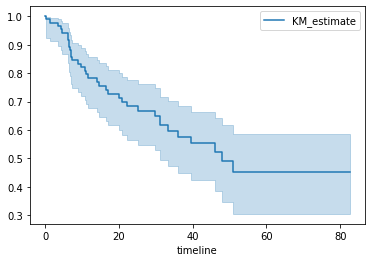

In [5]:
km = KaplanMeierFitter()
km_brain = km.fit(BrainCancer['time'], BrainCancer['status'])
km_brain.plot()

C:\Users\admin\AppData\Local\Temp\ipykernel_11680\2318599857.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for sex, df in BrainCancer.groupby('sex'):


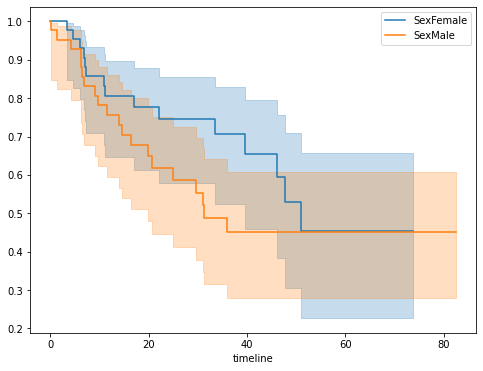

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
by_sex = {}
for sex, df in BrainCancer.groupby('sex'):
    by_sex[sex] = df
    km_sex = km.fit(df['time'], df['status'])
    km_sex.plot(label=f'Sex{sex}', ax=ax)

In [9]:
logrank_test(by_sex['Male']['time'], by_sex['Female']['time'], by_sex['Male']['status'], by_sex['Female']['status'])

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           1.44 0.23      2.12

In [13]:
coxph = CoxPHFitter()
sex_df = BrainCancer[['time', 'status', 'sex']]
model_df = MS(['time', 'status', 'sex'], intercept=False).fit_transform(sex_df)
cox_fit = coxph.fit(model_df, 'time', 'status')
cox_fit.summary

,coef,exp(coef),se(coef),coef lower 95%,coef upper 95%,exp(coef) lower 95%,exp(coef) upper 95%,cmp to,z,p,-log2(p)
covariate,,,,,,,,,,,
sex[Male],0.407668,1.503309,0.342004,-0.262648,1.077984,0.769013,2.93875,0.0,1.191998,0.233262,2.099977


In [17]:
cox_fit.log_likelihood_ratio_test()

<lifelines.StatisticalResult: log-likelihood ratio test>
null_distribution = chi squared
  degrees_freedom = 1
        test_name = log-likelihood ratio test

---
 test_statistic    p  -log2(p)
           1.44 0.23      2.12